## Ejemplo libro seccion 10.1

En el siguiente ejemplo se muestra como se relaciona la masa de un hoyo negro y la velocidad de dispersion de las estrellas en sus abultamiento.

Usualmente esta es la relación de la dispersión y la masa. En nuestro caso tenemos varias variables que representan distintas masas de distintos soles y su disperción asociada.

<img src="img\ss2.png" alt="Teorema de Bayes" class="center" width="250" height="300" >

In [1]:
#Se importan las librerias necesarias
import numpy as np
import pandas as pd
import pystan


In [3]:
#Se importa el set de datos
data_frame = dict(pd.read_csv("M_sigma.csv"))


In [4]:
#Se preparan los datos para el modelo de Stan
data = {}
data['obsx'] = np.array(data_frame['obsx'])
data['errx'] = np.array(data_frame['errx']) 
data['obsy'] = np.array(data_frame['obsy']) 
data['erry'] = np.array(data_frame['erry']) 
data['N'] = len(data['obsx'])


<img src="img\ss1.png" alt="Teorema de Bayes" class="center" width="250" height="300" >

In [14]:
# Stan Gaussian model 
stan_code=""" 
data{ 
    int<lower=0> N;             # number of data points 
    vector[N] obsx;             # obs velocity dispersion 
    vector<lower=0>[N] errx;    # errors in velocity dispersion measurements 
    vector[N] obsy;             # obs black hole mass 
    vector<lower=0>[N] erry;    # errors in black hole mass measurements 
} 
parameters{ 
    real alpha;                 # intercept 
    real beta;                  # angular coefficient 
    real<lower=0> epsilon;      # scatter around true black hole mass 
    vector[N] x;                # true velocity dispersion 
    vector[N] y;                # true black hole mass 
} 
  model{ 
    # likelihood and priors 
    alpha ~ normal(0, 1000); 
    beta ~ normal(0, 1000); 
    epsilon ~ gamma(0.001, 0.001); 
       for (i in 1:N){ 
        x[i] ~ normal(0, 1000); 
        y[i] ~ normal(0, 1000); 
    } 
      obsx ~ normal(x, errx); 
    y ~ normal(alpha + beta * x, epsilon); 
    obsy ~ normal(y, erry); 
} 
"""

In [15]:
# Run mcmc 
fit = pystan.stan(model_code=stan_code, data=data, iter=15000, chains=3, 
                warmup=5000, thin=10, n_jobs=3) 


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f9f66a9bb30d74a121426fec649a53d3 NOW.


In [19]:
nlines = 8

output = str(fit).split('\n') 
for item in output[:nlines]: 
    print(item)

Inference for Stan model: anon_model_f9f66a9bb30d74a121426fec649a53d3.
3 chains, each with iter=15000; warmup=5000; thin=10; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha     8.35  9.9e-4   0.06   8.24   8.31   8.35   8.39   8.46   3137    1.0
beta      4.46  6.2e-3   0.33    3.8   4.25   4.45   4.69   5.12   2837    1.0
epsilon   0.27  1.1e-3   0.06   0.16   0.23   0.27   0.31    0.4   2796    1.0


In [20]:
dataframe_fit = fit.to_dataframe()

In [21]:
dataframe_fit.keys()

Index(['chain', 'draw', 'warmup', 'alpha', 'beta', 'epsilon', 'x[1]', 'x[2]',
       'x[3]', 'x[4]',
       ...
       'y[44]', 'y[45]', 'y[46]', 'lp__', 'accept_stat__', 'stepsize__',
       'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__'],
      dtype='object', length=105)

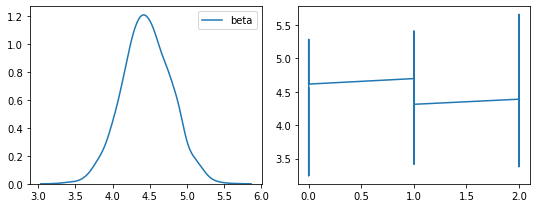

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

chain_idx = dataframe_fit['chain']
beta11 = dataframe_fit['beta']

plt.subplots(figsize=(15,3))
plt.subplot(1,4,1)
sns.kdeplot(beta11)
plt.subplot(1,4,2)
plt.plot(chain_idx, beta11)


plt.tight_layout()
plt.show()